In [30]:
#Essential Constants
from scipy.constants import h, c, hbar, u, k

#Imports from other script/s
from ipynb.fs.full.Conversions_Epimetheus import * #Conversion Doc
from ipynb.fs.full.Atomic_Mass_Key import element #Mass Key File
from ipynb.fs.full.EpiPan_Functions import * #All Functions

#General Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import itertools
import pandas as pd

In [31]:
#Import Desired PES
from ipynb.fs.full.O3_PES_fortran_JT import PES

### Manual Inputs

In [32]:
#Temperature
T = 300

In [33]:
molecule = ["O-17", "O-17", "O-17"]

In [34]:
#Positions/Bond Lengths/Angles
r1 = 1.28
r2 = r1
alpha = 116.78 
#Fortran values
r1 =1.27200
r2 = r1
alpha =116.7800
coord = coord_triatomic(alpha, r1, r2)

In [35]:
mass = ((element[molecule[0]] * u * kg_to_me), 
            (element[molecule[1]] * u * kg_to_me), 
            (element[molecule[2]] * u * kg_to_me))

In [36]:
B, I, COMcoord = rot_inertia_rcom(coord, mass)

R_com [0.        0.4444661 0.       ]
r_COMalpha [[-1.08328032  0.22223305  0.        ]
 [ 0.         -0.4444661   0.        ]
 [ 1.08328032  0.22223305  0.        ]]


### Calculations 

In [37]:
Key, Pos =  Key_and_Pos(coord)

In [38]:
PES_func = PES(Key, Pos, molecule)

In [39]:
Hess = Hess_CART(Key, Pos, PES, molecule)

In [40]:
Hess_MWC_fin = Hess_MWC(Hess, Key, mass)

In [41]:
eigvals, eigvecs, Hess_diag_au, Hess_diag_wn, fundamentals_au, fundamentals_wn = eigval_eigvec(Hess_MWC_fin)

In [42]:
eigvecs_UMW = UMW(eigvecs, mass, Key)

In [43]:
displace_vec, displace_val= displace_vec_and_val(eigvals, eigvecs_UMW)

In [44]:
cubic = cubic_CART(Key, Pos, displace_vec, displace_val, PES, molecule)

In [45]:
quartic = quartic_CART(Key, Pos, displace_vec, displace_val, PES, molecule)

In [46]:
sigma = sigma_ij(displace_val, cubic)

In [47]:
deltaETOSH = deltaETOSH_ij(displace_val, cubic, quartic, sigma)

In [48]:
allrot = all_rot_const(displace_vec, sigma, coord, mass, bohr_to_angstrom)

R_com [7.00664579e-08 4.44466082e-01 5.77842598e-19]
r_COMalpha [[-1.08632690e+00  2.20644565e-01  1.15545371e-18]
 [-9.82905686e-03 -4.47340970e-01 -5.77631686e-19]
 [ 1.09615596e+00  2.26696405e-01 -5.77822026e-19]]
R_com [0.0000000e+00 4.4446610e-01 9.1057735e-35]
r_COMalpha [[-1.08328032e+00  2.22233050e-01  1.82075677e-34]
 [-7.49868862e-19 -4.44466100e-01 -9.10214985e-35]
 [ 1.08328032e+00  2.22233050e-01 -9.10541781e-35]]
R_com [4.24813664e-08 4.44466087e-01 3.43393106e-19]
r_COMalpha [[-1.08658318e+00  2.21228680e-01  6.86693480e-19]
 [-5.95936741e-03 -4.46126596e-01 -3.43308448e-19]
 [ 1.09254255e+00  2.24897917e-01 -3.43385032e-19]]


In [49]:
key_data = data_file_maker_triatomic(displace_val, deltaETOSH, B, allrot, "O3_777_18PoZo_specconst")

   harmonic_wn  anharmonic_wn     B_000   B_Freq1   B_Freq2   B_Freq3
0  1100.834650    1088.461723  3.346580  3.304424  3.346580  3.321982
1  1057.338144    1016.693754  0.422531  0.416348  0.422531  0.417657
2   694.020169     681.735483  0.375163  0.369759  0.375163  0.371012


In [50]:
J_max_arr, A_rot, B_rot, C_rot = J_max_func(B, T)

In [51]:
P_nu1, P_rot_nu1, P_index_nu1 = asytop_v_P(1, J_max_arr, "B", deltaETOSH[0] , A_rot, allrot[0][0], B_rot, allrot[0][1], C_rot, allrot[0][2])

Q_nu1, Q_rot_nu1, Q_index_nu1 = asytop_v_Q(1, J_max_arr, "B", deltaETOSH[0] , A_rot, allrot[0][0], B_rot, allrot[0][1], C_rot, allrot[0][2])

R_nu1, R_rot_nu1, R_index_nu1 = asytop_v_R(1, J_max_arr, "B", deltaETOSH[0] , A_rot, allrot[0][0], B_rot, allrot[0][1], C_rot, allrot[0][2])
##

100%|██████████| 74/74 [00:10<00:00,  7.22it/s] 


In [52]:
P_nu2, P_rot_nu2, P_index_nu2 = asytop_v_P(1, J_max_arr, "B", deltaETOSH[2] , A_rot, allrot[2][0], B_rot, allrot[2][1], C_rot, allrot[2][2])

Q_nu2, Q_rot_nu2, Q_index_nu2 = asytop_v_Q(1, J_max_arr, "B", deltaETOSH[2] , A_rot, allrot[2][0], B_rot, allrot[2][1], C_rot, allrot[2][2])

R_nu2, R_rot_nu2, R_index_nu2 = asytop_v_R(1, J_max_arr, "B", deltaETOSH[2] , A_rot, allrot[2][0], B_rot, allrot[2][1], C_rot, allrot[2][2])
##

100%|██████████| 74/74 [00:11<00:00,  6.26it/s] 


In [53]:
P_nu3, P_rot_nu3, P_index_nu3 = asytop_v_P(2, J_max_arr, "A", deltaETOSH[1] , A_rot, allrot[1][0], B_rot, allrot[1][1], C_rot, allrot[1][2])

Q_nu3, Q_rot_nu3, Q_index_nu3 = asytop_v_Q(2, J_max_arr, "A", deltaETOSH[1] , A_rot, allrot[1][0], B_rot, allrot[1][1], C_rot, allrot[1][2])

R_nu3, R_rot_nu3, R_index_nu3 = asytop_v_R(2, J_max_arr, "A", deltaETOSH[1] , A_rot, allrot[1][0], B_rot, allrot[1][1], C_rot, allrot[1][2])
##

100%|██████████| 74/74 [00:10<00:00,  7.03it/s] 


In [54]:
nu1_I = Norm_I(P_rot_nu1, P_index_nu1, Q_rot_nu1, Q_index_nu1, R_rot_nu1, R_index_nu1, T, 1, 0.039)
##

In [55]:
nu2_I = Norm_I(P_rot_nu2, P_index_nu2, Q_rot_nu2, Q_index_nu2, R_rot_nu2, R_index_nu2, T, 1, 0.047)
##

In [56]:
nu3_I = Norm_I(P_rot_nu3, P_index_nu3, Q_rot_nu3, Q_index_nu3, R_rot_nu3, R_index_nu3, T, 1, 1)
##

In [57]:
Final_I = Fin_I(nu1_I[0], nu1_I[1],nu1_I[2], nu2_I[0], nu2_I[1], nu2_I[2], nu3_I[0], nu3_I[1], nu3_I[2])
##

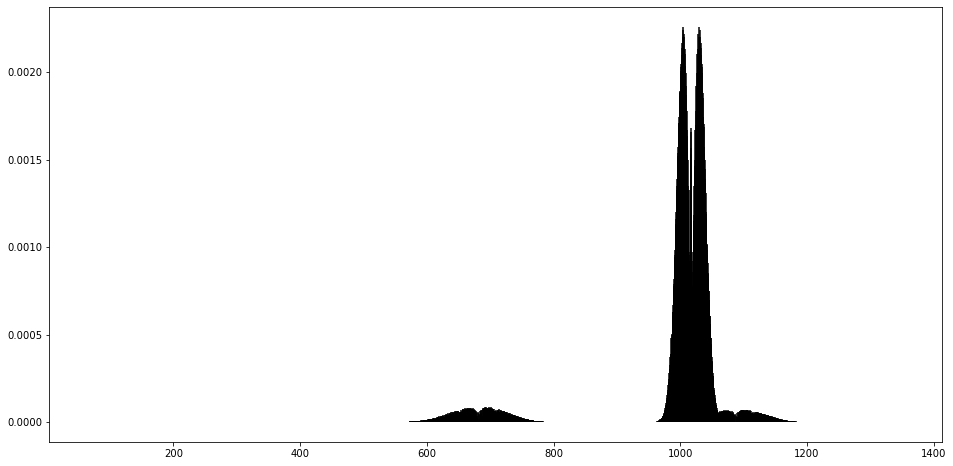

In [59]:
Pos = np.concatenate((P_nu1, Q_nu1, R_nu1, P_nu2, Q_nu2, R_nu2, P_nu3, Q_nu3, R_nu3))
Pos = np.reshape(Pos, (len(Pos),1))
Int = np.concatenate((Final_I[0], Final_I[1], Final_I[2], Final_I[3], Final_I[4], Final_I[5], Final_I[6], Final_I[7], Final_I[8]))
Int = np.reshape(Int, (len(Int),1))
Pos_and_Int = np.concatenate((Pos,Int), axis=1)
np.savetxt("O3_777_18PoZo_outputdata_WN_and_INT.txt", Pos_and_Int, delimiter=",")
#Quick double check of the data saved
plt.figure(figsize=(16,8))
plt.vlines(Pos_and_Int[:,0],0,Pos_and_Int[:,1])